# Introduction to GeoPandas. Part 2


Welcome. This is the second part of the Introduction to GeoPandas Workshop. Today we will be finally talking about [GeoPandas](https://geopandas.org/ "GeoPandas") (gpd). GeoPandas is a very popular tool to explore and manipulate GIS data in Python. As we discovered last time, it is based on Pandas, which entails that it is naturally integrated in many other popular packages. If you plan to create a data analysis pipeline involving GIS data, GeoPandas is likely a good choice.

<div class="alert alert-block alert-success">
<b>More Technical:</b> Throughout the notebook. This kind of boxes provide more technical details on what you are seeing. They contain helpful tips, but you can safely skip them the first time you run through the code.
</div>

There are three main components in GeoPandas: 
1.   Pandas will handle the data you load;
2.   Fedora will open GIS file of many, many kinds;
3.   Shapely will deal with geometrical operations on the shapes we have;
4.   Matplotlib will plot your maps.

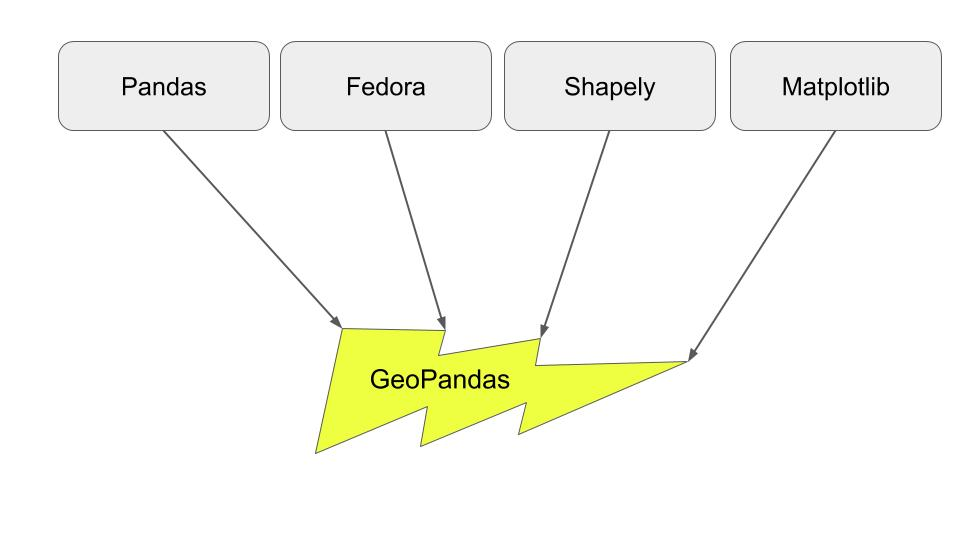


<div class="alert alert-block alert-success">
<b>Descartes:</b> To plot, gpd uses a matplotlib-based package named Descartes, which transforms shapely geometrical objects into matplotlib objects. In my own experience, I have rarely interacted with this package myself.
</div>

As a first step, we need to import GeoPandas. Here I also make sure that the version of gpd we are using is up to date. Some of the code I wrote will not work otherwise -- and it is, in general, a good idea to have our package updated when we start a new project.

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
# We use shapely a little bit later
import shapely

In [ ]:
%matplotlib inline

In [ ]:
# This line check the pandas version and it makes sure it is at least 1.0.2
version = pd.__version__.split(".")
print(f"Pandas version: {pd.__version__}")
assert int(version[0]) >= 1
assert int(version[2]) >= 2

# This line checks the version of gpd and makes sure it is >0.7
version = gpd.__version__.split(".")
print(f"GeoPandas version: {gpd.__version__}")
assert int(version[1]) >= 1


### The Geo in GeoPandas

Last time, we saw that the two main objects in Pandas are Series and DataFrame. You will not be surprised to learn that the main two objects in GeoPandas are the **GeoSeries** and the **GeoDataFrame**. The GeoSeries and GeoDataFrame are really the geographical version of Series and DataFrame: you can handle exactly as you handle ordinary Pandas Series and DataFrame. That is, you can think about the Geo-versions of these objects as having all the methods and attributes of their Pandas' parents. 
There is one main difference, though. GeoSeries and GeoDataFrames have their own specific attributes and methods dealing with the GIS data they contain. We explore this characteristic here. Just for this first exploration, we create a GeoSeries and a GeoDataFrame from scratch. We create 4 points with random coordinates, using numpy to draw random numbers between 0 and 1. 


<div class="alert alert-block alert-success">
<b>Shapely:</b> It is often very useful to know Shapely to manipulate geometrical objects above and beyond what GeoPandas allows you to do. The best resource to learn Shapely (to my knowledge) is its User Manual: https://shapely.readthedocs.io/en/latest/manual.html
</div>


Let's start with creating a GeoSeries. You will remember from last time that Pandas Series can contain different type of data and that different operations are allowed based on the data type. A GeoSeries is specific object from GeoPandas. It is meant to contain one and only one type of data: the `geometry` dtype.  `geometry` is a dtype that is specific to GeoPandas -- you will not find it in Pandas. As the name suggests, it is meant to contain and manipulate information about geometric point in a (2D) space. This is the dtype that will store information about our maps. Leaving the constraints on dtype aside, a GeoSeries behaves exactly as a Series: it has the _shape_ ,  _dtype_ , _index_ and _values_ attributes.

To create the GeoSeries we use the [points_from_xy](https://geopandas.readthedocs.io/en/latest/reference/geopandas.points_from_xy.html#geopandas.points_from_xy, "points_from_xy Documentation") method, which creates a list of shapely points starting from a list (or array) of x coordinates and an array of y coordinates. 

In [ ]:
# To create a GeoSeries/GeoDataFrame we need a series of geometrical objects.
# Start with drawing random numbers
np.random.seed(345)
coords = np.random.random((4,2))
print(f"These are the random coordinate:\n{coords}")
# We pass the rows as separate arguments to points_from_xy.
# The first row will become the x coordinates of the points
# The second row will become the y coordinates of the points
pts = gpd.points_from_xy(coords[:,0], coords[:,1])
pts = gpd.GeoSeries(pts)
# Let us see some of the attributes of the GeoSeries
print(f"This is the shape attribute: {pts.shape}")
print(f"This is the dtype attribute: {pts.dtype}")
print(f"This is the index attribute: {pts.index}")
print(f"This is the values attribute:\n{pts.values}\n")
# As usual, the default index is just an ordered array of integers.
# We change the index to something more interesting
new_ind = ['Paul', 'George', 'John', 'Richard']
pts.index = new_ind
print(f"This is the new index attribute: {pts.index}")

GeoSeries are and Series can be combined to create a GeoDataFrame. This is a Pandas DataFrame with a special column storing the shape the geometrical information about the data. Such column is indicated as the geometry column of the GeoDataFrame, it is of the `geometry` dtype and it is registered in the _geometry_ attribute of the GeoDataFrame. On a more technical level, the "geometry" column can contain any kind of Shapely geometrical objects: points, polygons, lines and collections of those. We can use any properly-shaped GeoSeries as the geometry column of a GeoDataFrame. Most of the time, this column will aslo be named as "geometry", even if it can have any arbitrary name.

<div class="alert alert-block alert-success">
<b>Multiple Geometries:</b> As the documentation itself acknowledges, things get 'somewhat confusing' with all the different (and important!) things named "geometry" in GeoPandas. To be clear, a GeoDataFrame will always have only one geometry, but it can have more than one column of the geometry dtype and there is no need to have a column named 'geometry'. However, there is the need for a GeoDataFrame to have a geometry in order to access geometry based methods (like plotting).
</div>

Let's build a GeoDataFrame with the GeoSeries we created above as its geometry.

In [ ]:
# We will collect few other data in Series in order to create a GeoDataFrame
dob = [1942, 1943, 1940, 1940]
dob = pd.Series(dob)
dob.index = new_ind
most_famous_song = ['Yesterday', 'Here Comes the Sun', 'She Loves You', 'Yellow Submarine']
most_famous_song = pd.Series(most_famous_song)
most_famous_song.index = new_ind
# Now we create a new GeoDataFrame
# Notice that the name of the geometry column is not "geometry"
beatles_gdf = gpd.GeoDataFrame({'dob': dob, 'song': most_famous_song, 'geometry': pts})
# As usual we use .head() to see the first (and only) lines
print(f'This is the GeoDataFrame:\n{beatles_gdf}\n\n')
# Since we passed a column named "geometry", GeoPandas rightly guessed this is the column we wanted as our geometry
# This is pretty standard practice
print(f'This is the geometry attribute of the GeoDataFrame:\n{beatles_gdf.geometry}\n')
# If you are wondering which column is set as a geometry, it is registered in the geometry.name attribute
print(f'This is the name of the column containing the geometry: {beatles_gdf.geometry.name}')

You may be wondering what is so special about the geometry column of a GeoDataFrame. The data in this column is used in all the methods and attributes dealing with geometrical properties. Following there are few examples of these methods. Here we use [.buffer( )](https://geopandas.org/geometric_manipulations.html#geoseries.buffer, ".buffer() Documentation"), [.envelope](https://geopandas.org/geometric_manipulations.html#geoseries.envelope, ".envelope() Documentation"), [.area](https://geopandas.org/geometric_manipulations.html#geoseries.area, ".area Documentation") and [.boundary](https://geopandas.org/geometric_manipulations.html#geoseries.boundary, ".boundary Documentation").

The geometry column is also what is plotted by the .plot() method of a GeoDataFrame. We use it here to show the various transformations visually, but we will talk about it a little later.

In [ ]:
# You can plot the geometry -- more on this later
beatles_gdf.plot()
# You can expand the points into circles with buffer
beatles_gdf['geometry'] = beatles_gdf.buffer(0.04)
beatles_gdf.plot()
# You can create rectangles around it!
beatles_gdf['geometry'] = beatles_gdf.envelope
beatles_gdf.plot()
# You can ask for the boundary -- the points delimiting the objects in the geometry
beatles_gdf = beatles_gdf.boundary
beatles_gdf.plot()

#### Your turn!

I have set up two lists. The first list contains two Shapely geometrical objects -- namely, a LineCollection. The second list contains two strings. The final objective is to create a GeoDataFrame having the LineCollection as a geometry, plot it, get its area and the rotate it by 90 degrees. 

To get the area of a geometry you can use the [.area](https://geopandas.org/geometric_manipulations.html#geoseries.area, ".area Documentation") attribute. To rotate a geometry you can use the [.rotate( )](https://geopandas.org/geometric_manipulations.html#geoseries.rotate, ".rotate( ) Documentation"). Look in the comment for suggestions.



In [ ]:
# These lines are just creating the right types of geometrical objects with the right coordinates
coords1 = [((5.5, 0), (5,5), (0, 6.5), (5, 9), (5.5, 14), (9, 10.5), (14, 12), (11.5, 6.5), (14, 2), (9, 3.5), (5.5, 0))]
coords2 = [((-10, -8), (-9,-9), (-8,-8), (-8, 0)), ((-8, 0), (-1,0), (-4,4), (-8,5), (-12,4), (-15, 0), (-8, 0))]
geom1 = shapely.geometry.MultiLineString(coords1)
geom2 = shapely.geometry.MultiLineString(coords2)

# These are the two lists mentioned in the prompt
list_geom    = [geom1, geom2]
list_strings = ['Starman', 'Singing in the Rain']

# Create a GeoDataFrame
# new_gdf = gpd.GeoDataFrame({'Titles':... , 'geometry': ...})

# plot it

# Rotate the geometry by 90 degress.
# For example, new_gdf.rotate(180) will rotate the geometry by 180 degrees

# plot the rotate geometry

# Get the area of the geometry

# Why these values for the area?
# Because the objects in the geometry are lines. Lines have no area

### Data Analysis with GeoPandas

In [ ]:
# Shapefiles are a set of files. It is often convenient to store them in a compressed folder.
# Geopandas will deal with zipped folder containing the files just as easily. 
# Notice that we are even giving gpd an url, the file is not on our HD. But gpd is smart enough to
# understand we are giving him an internet address, download the file in memory and open it.
# Naturally, if you plan to work with a shape file persistently, or the file is particularly big, 
# it is way more convenient to have a local version of the shapefile. But this is still very cool.
url_blkgrp    = r'https://github.com/non87/GeoPandas-Workshop/blob/master/data/grpblk/grpblk.zip?raw=true'
url_redlining = r'https://github.com/non87/GeoPandas-Workshop/blob/master/data/redlining/redlining.zip?raw=true'
blk = gpd.read_file(url_blkgrp)
rdl = gpd.read_file(url_redlining)
print(blk.shape)

# for fl in new_fls
# print(os.listdir())
# s = open(v[0])
# print(s)8t
# s.close
